# **Aymeric BEILLON et Antoine BERTIN**

# **Introduction**
----------------

### Le but de ce projet est de créer un modèle de classification supervisée, permettant, à partir d'un jeu de données d'une compagnie d'assurance de classer des données. 
Ces données prennent la forme de profils clients, ces profils comprennent de nombreuses informations comme par exemple l'âge, le genre ou le credit score de l'assuré. La donnée importante pour la création de notre modèle et la connaissance de si, oui ou non, l'assuré à fait une demande d'indemnisation, cela pourra permettre à cette compagnie d'assurance de prévoir à l'avance selon le profil de nouveau clients, si ils feront une nouvelle demande. 



## PARTIE 1 Importation et lecture des données
Ce premier bout de code permet de récupérer et lire les données depuis notre fichier CSV afin d'avoir une première analyse superficielle, ce faisant, nous pouvons vérifier la forme que prennent ces dites données. Ainsi nous pouvons préciser l'objectif du problème, il faut analyser les données pour prédire la demande d'indemnisation 

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Importation des données
data = pd.read_csv('car_insurance.csv')

# Examen des premières lignes et des informations sur les colonnes
first_rows = data.head()
info = data.info()
description = data.describe()



first_rows, info, description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  int64  
 2   gender               10000 non-null  int64  
 3   driving_experience   10000 non-null  object 
 4   education            10000 non-null  object 
 5   income               10000 non-null  object 
 6   credit_score         9018 non-null   float64
 7   vehicle_ownership    10000 non-null  float64
 8   vehicle_year         10000 non-null  object 
 9   married              10000 non-null  float64
 10  children             10000 non-null  float64
 11  postal_code          10000 non-null  int64  
 12  annual_mileage       9043 non-null   float64
 13  vehicle_type         10000 non-null  object 
 14  speeding_violations  10000 non-null  int64  
 15  duis                 10000 non-null  

(       id  age  gender driving_experience    education         income  \
 0  569520    3       0               0-9y  high school    upper class   
 1  750365    0       1               0-9y         none        poverty   
 2  199901    0       0               0-9y  high school  working class   
 3  478866    0       1               0-9y   university  working class   
 4  731664    1       1             10-19y         none  working class   
 
    credit_score  vehicle_ownership vehicle_year  married  children  \
 0      0.629027                1.0   after 2015      0.0       1.0   
 1      0.357757                0.0  before 2015      0.0       0.0   
 2      0.493146                1.0  before 2015      0.0       0.0   
 3      0.206013                1.0  before 2015      0.0       1.0   
 4      0.388366                1.0  before 2015      0.0       0.0   
 
    postal_code  annual_mileage vehicle_type  speeding_violations  duis  \
 0        10238         12000.0        sedan       

# PARTIE 2 
-------
Dans cette partie l'objectif est de déceler, en analysant via des fonctions python, les valeurs manquantes et ou aberrantes présentes dans notre jeu de données. Ici, pour vérifier la présence potentielle de valeurs 'NA', nous allons utiliser la fonction isna() de Pandas, cette fonction permet de retourner ceci sur un DataFrame. Associée à la fonction sum(), nous pouvons retourner le nombre total de valeurs nulles sur chaque colonne. Il est également important de pouvoir vérifier les valeurs aberrantes, pour ce faire nous utilisons la méthode max() de python, permettant de retourner la valeur maximum de chaque colonne. Cette étape de vérification des données est essentielle puisqu'elle permet de savoir les actions à réaliser durant la phase de préparation des données. Pour vérifier les valeurs aberrantes, nous pouvons utiliser un box plot, qui représente les données de manière plus claire pour voir la présence de ces valeurs.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  int64  
 2   gender               10000 non-null  int64  
 3   driving_experience   10000 non-null  object 
 4   education            10000 non-null  object 
 5   income               10000 non-null  object 
 6   credit_score         9018 non-null   float64
 7   vehicle_ownership    10000 non-null  float64
 8   vehicle_year         10000 non-null  object 
 9   married              10000 non-null  float64
 10  children             10000 non-null  float64
 11  postal_code          10000 non-null  int64  
 12  annual_mileage       9043 non-null   float64
 13  vehicle_type         10000 non-null  object 
 14  speeding_violations  10000 non-null  int64  
 15  duis                 10000 non-null  

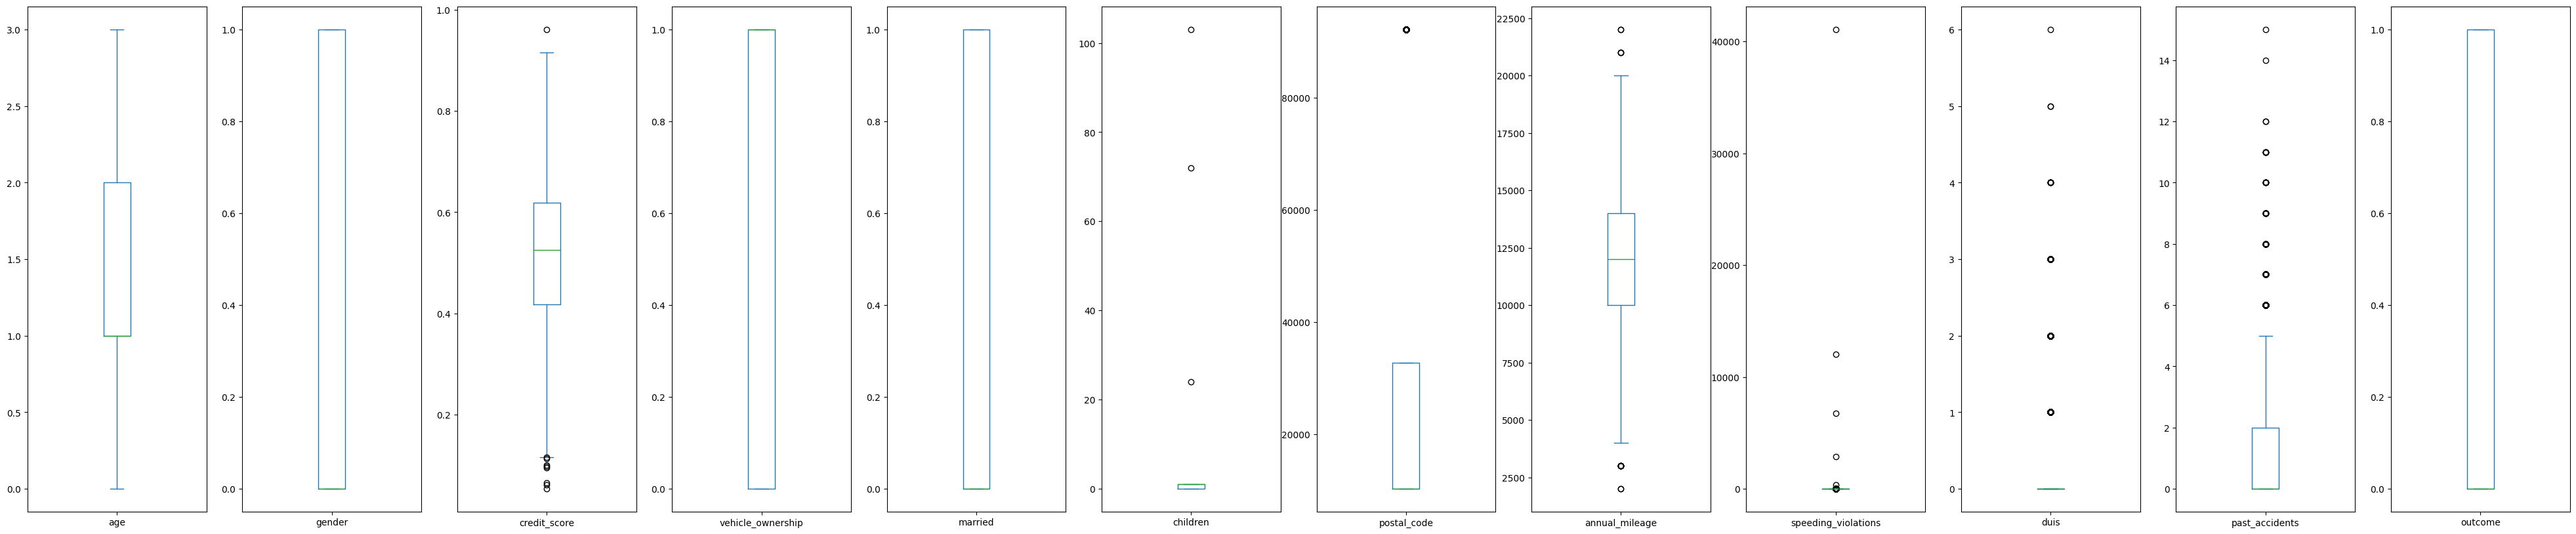

id                       0
age                      0
gender                   0
driving_experience       0
education                0
income                   0
credit_score           982
vehicle_ownership        0
vehicle_year             0
married                  0
children                 0
postal_code              0
annual_mileage         957
vehicle_type             0
speeding_violations      0
duis                     0
past_accidents           0
outcome                  0
dtype: int64
id                            999976
age                                3
gender                             1
driving_experience              30y+
education                 university
income                 working class
credit_score                0.960819
vehicle_ownership                1.0
vehicle_year             before 2015
married                          1.0
children                       103.0
postal_code                    92101
annual_mileage               22000.0
vehicle_type        

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Importation des données
data = pd.read_csv('car_insurance.csv')

# Examen des premières lignes et des informations sur les colonnes
first_rows = data.head()
info = data.info()
description = data.describe()
maxi = data.max()


# Détection des valeurs manquantes
missing_values = data.isna().sum()
data = data.drop(columns=['id'])

data.plot(kind='box', subplots=True, sharex=False, sharey=False, figsize=(50, 10))
plt.show()

first_rows, info, description, missing_values


## Affichage du nombre de données manquantes pour chaque colonne
print(missing_values)
print(maxi)


Ici nous pouvons ainsi repérer deux colonnes (credit_score et annual_mileage) qui comporte respectivement 982 et 957 valeurs manquantes. 
Afin de pouvoir travailler avec ces colonnes, il existe plusieurs solutions. Celles-ci peuvent être: 
- Suppression de la colonne
- Imputation des valeurs manquantes à une valeur médiane
- Mise à la valeur la plus courante

Dans notre cas, le plus intéressant sera l'imputation à une valeur médiane afin de conserver le plus de cohérence sur les données

Nous observons également des valeurs dites "aberrantes", qui sont trop élevées sans faire de sens, pour celle-ci, nous appliquerons une méthode permettant de limiter les valeurs entre des bornes. Ce box plot permet de voir clairement les valeurs aberrantes, pusique nous pouvons voir une valeur d'enfant au delà de 100, ceci ne faisant pas de sens, il sera nécessaire de la modifier dans la préparation de données

# PARTIE 3 PREPARATION DES DONNEES
-----
 
Comme vu plus tôt nous retrouvons des valeurs 'NA' et des valeurs aberrantes, dans cette phase de préparation des données, nous allons faire en sorte d'imputer des valeurs et de lisser le jeu de données afin de pouvoir retrouver un dataset cohérent, sur lequel nous pouvons travailler.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  int64  
 2   gender               10000 non-null  int64  
 3   driving_experience   10000 non-null  object 
 4   education            10000 non-null  object 
 5   income               10000 non-null  object 
 6   credit_score         9018 non-null   float64
 7   vehicle_ownership    10000 non-null  float64
 8   vehicle_year         10000 non-null  object 
 9   married              10000 non-null  float64
 10  children             10000 non-null  float64
 11  postal_code          10000 non-null  int64  
 12  annual_mileage       9043 non-null   float64
 13  vehicle_type         10000 non-null  object 
 14  speeding_violations  10000 non-null  int64  
 15  duis                 10000 non-null  

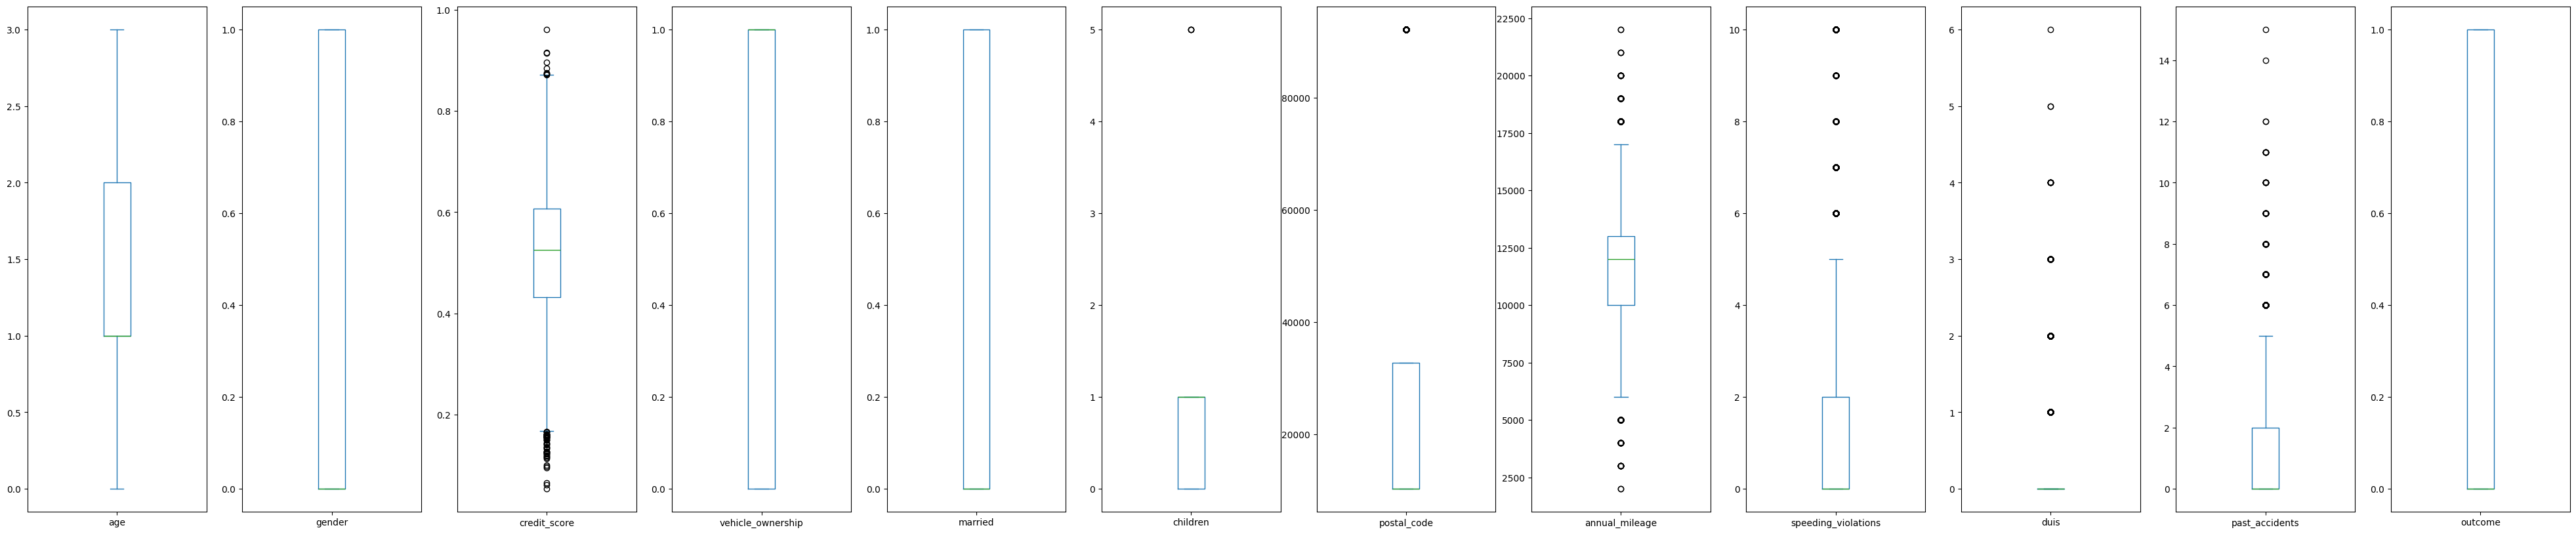

In [60]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('car_insurance.csv')

# Examen des premières lignes et des informations sur les colonnes
first_rows = data.head()
info = data.info()
description = data.describe()


#suppression de la valeur inutile
data = data.drop(columns=['id'])

# Imputation des valeurs manquantes
imputer = SimpleImputer(strategy='median')
data['credit_score'] = imputer.fit_transform(data[['credit_score']])
data['annual_mileage'] = imputer.fit_transform(data[['annual_mileage']])

# Limitation des valeurs aberrantes
data['speeding_violations'] = data['speeding_violations'].apply(lambda x: min(x, 10))
data['children'] = data['children'].apply(lambda x: min(x, 5))

missing_values = data.isnull().sum()

data.plot(kind='box', subplots=True, sharex=False, sharey=False, figsize=(50, 10))


# Encodage des variables qualitatives
categorical_features = ['driving_experience', 'education', 'income', 'vehicle_year', 'vehicle_type']
encoder = LabelEncoder()
data[categorical_features] = data[categorical_features].apply(encoder.fit_transform)

# Transformation des données
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), ['age', 'credit_score', 'annual_mileage']),
        ('cat', LabelEncoder(), categorical_features)
    ])

print(missing_values)



Après avoir préparé les données nous pouvons de nouveau les analyser comme fait dans la partie précédente. 
Nous n'avons ainsi plus de valeurs nulles, ni de valeurs aberrantes, notre jeu de données est donc prêt pour les parties suivantes:  la recherche de corellations et l'entraînement de notre modèle.

# PARTIE 4


In [62]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('car_insurance.csv')

# Examen des premières lignes et des informations sur les colonnes
first_rows = data.head()
info = data.info()
description = data.describe()


# Imputation des valeurs manquantes
imputer = SimpleImputer(strategy='median')
data['credit_score'] = imputer.fit_transform(data[['credit_score']])
data['annual_mileage'] = imputer.fit_transform(data[['annual_mileage']])

# Limitation des valeurs aberrantes
data['speeding_violations'] = data['speeding_violations'].apply(lambda x: min(x, 20))
data['children'] = data['children'].apply(lambda x: min(x, 5))

# Encodage des variables qualitatives
categorical_features = ['driving_experience', 'education', 'income', 'vehicle_year', 'vehicle_type']
encoder = LabelEncoder()
data[categorical_features] = data[categorical_features].apply(encoder.fit_transform)

# Transformation des données
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), ['age', 'credit_score', 'annual_mileage']),
        ('cat', OneHotEncoder(), categorical_features)
    ])

numeric_data = data[['age', 'credit_score', 'annual_mileage', 'speeding_violations', 'duis', 'past_accidents', 'outcome','vehicle_year']]

cor = numeric_data.corr()
scatter_matrix = pd.plotting.scatter_matrix(numeric_data, figsize=(15, 15))


plt.show()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  int64  
 2   gender               10000 non-null  int64  
 3   driving_experience   10000 non-null  object 
 4   education            10000 non-null  object 
 5   income               10000 non-null  object 
 6   credit_score         9018 non-null   float64
 7   vehicle_ownership    10000 non-null  float64
 8   vehicle_year         10000 non-null  object 
 9   married              10000 non-null  float64
 10  children             10000 non-null  float64
 11  postal_code          10000 non-null  int64  
 12  annual_mileage       9043 non-null   float64
 13  vehicle_type         10000 non-null  object 
 14  speeding_violations  10000 non-null  int64  
 15  duis                 10000 non-null  

ValueError: Columns must be same length as key